In [8]:
# Load the specified file from the provided path
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# USMLE

CoT = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/USMLE/mixtral8x7b-instructv1/FewShotCoTAgent/Prompt 11/Summarize True/Two-step False/06-01-24/5ffc6b947ca08dfff3c2326dc1f17c82455da4429c719171799ac9f18fcc8283/dataset.jsonl"
WikiCoT = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/USMLE/mixtral8x7b-instructv1/WikipediaCoTAgent/Prompt 11/Summarize True/Two-step False/Sumfilter True/14-01-24/5c0a66318f708e5c3cf877d963510dfe3c4cf35aee4b0f6b144dc7ae27ca62cf/dataset.jsonl"

Direct = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/USMLE/mixtral8x7b-instructv1/DirectAgent/Prompt 11/Summarize False/Two-step False/Sumfilter False/06-01-24/615106120beac97effd5833421c0bd06ae38e845e0ca599f7e87ff35da540f0b/dataset.jsonl"
WikiDirect = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/USMLE/mixtral8x7b-instructv1/WikipediaDirectAgent/Prompt 11/Summarize False/Two-step False/Sumfilter False/14-01-24/6f7053838a44cfe5a72a919ec015f8cb2f3f25b607fee2a4cdcd1c7e8df7b256/dataset.jsonl"

CoTMedMCQA = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/medmcqa/mixtral8x7b-instructv1/FewShotCoTAgent/Prompt 11/Summarize True/Two-step False/06-01-24/5ffc6b947ca08dfff3c2326dc1f17c82455da4429c719171799ac9f18fcc8283/dataset.jsonl"
WikiCoTMedMCQA = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/medmcqa/mixtral8x7b-instructv1/WikipediaCoTAgent/Prompt 11/Summarize True/Two-step False/Sumfilter True/16-01-24/5c0a66318f708e5c3cf877d963510dfe3c4cf35aee4b0f6b144dc7ae27ca62cf/dataset.jsonl"

DirectMedMCQA = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/medmcqa/mixtral8x7b-instructv1/DirectAgent/Prompt 11/Summarize True/Two-step False/Sumfilter True/06-01-24/615106120beac97effd5833421c0bd06ae38e845e0ca599f7e87ff35da540f0b/dataset.jsonl"
WikiDirectMedMQA = r"/Users/jensperregaardthorsen/git/rosetta/scratch/rosetta-results/medmcqa/mixtral8x7b-instructv1/WikipediaDirectAgent/Prompt 11/Summarize False/Two-step False/Sumfilter False/14-01-24/6f7053838a44cfe5a72a919ec015f8cb2f3f25b607fee2a4cdcd1c7e8df7b256/dataset.jsonl"


In [3]:
def load_file(file_path):
    # Attempt to load the file again, treating each line as a dictionary
    with open(file_path, 'r') as file:
        file_content_dicts = [json.loads(line) for line in file]


    # Convert the list of dictionaries to a pandas dataframe
    df = pd.DataFrame(file_content_dicts)
    return df


In [4]:
def merge_baseline_and_agent(file_baseline, file_agent):
    # Load the files
    df_baseline = load_file(file_baseline)
    df_agent = load_file(file_agent)

    # Merge the two dataframes on the id column
    df_merged = pd.merge(df_baseline, df_agent, on='id', suffixes=('_baseline', '_agent'))
    return df_merged

In [12]:
df_Direct = merge_baseline_and_agent(Direct, WikiDirect)
df_CoT = merge_baseline_and_agent(CoT, WikiCoT)


In [6]:
df_MedMCQA_Direct = merge_baseline_and_agent(DirectMedMCQA, WikiDirectMedMQA)
df_MedMCQA_CoT = merge_baseline_and_agent(CoTMedMCQA, WikiCoTMedMCQA)

In [94]:
# save df as csv
df.to_csv('CoTvsWikiCoT.csv')

In [95]:
print("df1: ",sum(df1['exactmatch'])/len(df1['exactmatch']))
print("df2: ",sum(df2['exactmatch'])/len(df2['exactmatch']))

df1:  0.6472898664571878
df2:  0.6559308719560094


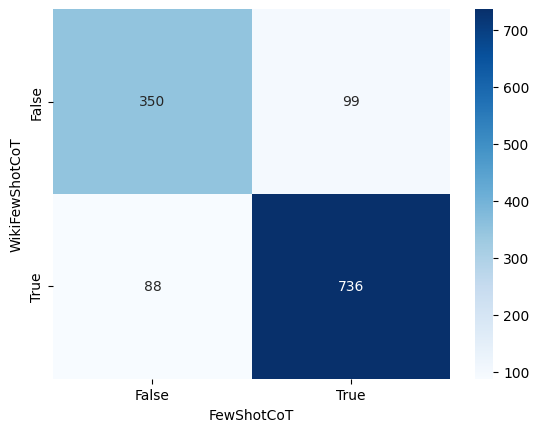

In [96]:
import seaborn as sns
# plot a  confusion matrix of the two datasets on the exactmatch feature. The exactmatch is true/false
# for the two datasets. The confusion matrix shows the number of true/false for both datasets
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(df['exactmatch_x'], df['exactmatch_y'], rownames=['WikiFewShotCoT'], colnames=['FewShotCoT'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

plt.show()



#confusion_matrix = pd.crosstab(df['exactmatch_baseline'], df['exactmatch_y'], rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)


In [97]:
analysis_df(df_Direct)

,Baseline_Correct,Extension_Correct,Count,Scenario,Percentage
0,True,True,650,Both Correct,51.060487
1,False,False,415,Neither Correct,32.600157
2,False,True,139,Wiki-augmented Correct,10.919089
3,True,False,69,Baseline Correct,5.420267


/var/folders/33/758wd8s95y39c5v7fg95c1z40000gn/T/ipykernel_1118/2381631568.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Percentage', data=dfP, palette="Blues_d", ax=axes[0])
/var/folders/33/758wd8s95y39c5v7fg95c1z40000gn/T/ipykernel_1118/2381631568.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Percentage', data=DfC, palette="Oranges_d", ax=axes[1])


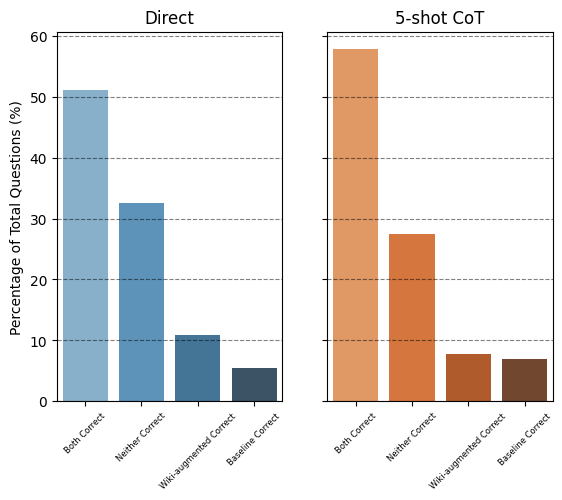

In [98]:


def analysis_df(df):
     # Assuming 'df' is your DataFrame and it has been processed as earlier
    analysis_df = pd.DataFrame({
        'Baseline_Correct': df['prediction_baseline'] == df['answer_idx_baseline'],
        'Extension_Correct': df['prediction_agent'] == df['answer_idx_agent']
    })
    scenario_counts_df = analysis_df.value_counts().reset_index()
    scenario_counts_df.columns = ['Baseline_Correct', 'Extension_Correct', 'Count']

    # Total number of questions
    total_questions = len(df)

    # Mapping scenarios for clarity and calculating percentages
    scenario_mapping = {
        (True, True): 'Both Correct',
        (False, True): 'Wiki-augmented Correct',
        (False, False): 'Neither Correct',
        (True, False): 'Baseline Correct'
    }
    scenario_counts_df['Scenario'] = scenario_counts_df.apply(lambda row: scenario_mapping[(row['Baseline_Correct'], row['Extension_Correct'])], axis=1)
    scenario_counts_df['Percentage'] = (scenario_counts_df['Count'] / total_questions) * 100
    return scenario_counts_df


def plot_agreement(dfPrompt, DfCoT):

    # make the below plot for the two datasets.
    # The plot shows the number of questions where the two datasets agree on the exactmatch feature
    # The plot shows the number of questions where the two datasets disagree on the exactmatch feature
    # The plot shows the number of questions where the one dataset is true and the other is false on the exactmatch feature
    # The plot shows the number of questions where the one dataset is false and the other is true on the exactmatch feature

    # make a subplot with one row and two columns that share the y-axis
    # each subplot should be a barplot with the above mentioned features treated like below
    dfP = analysis_df(dfPrompt)
    DfC = analysis_df(DfCoT)



    # subplot
    fig, axes = plt.subplots(1, 2, sharey=True)
    sns.barplot(x='Scenario', y='Percentage', data=dfP, palette="Blues_d", ax=axes[0])
    sns.barplot(x='Scenario', y='Percentage', data=DfC, palette="Oranges_d", ax=axes[1])

    # add gridlines for both subplots
    axes[0].grid(axis='y', linestyle='--', color='black', alpha=0.5)
    axes[1].grid(axis='y', linestyle='--', color='black', alpha=0.5)

    # add ylabel to the left subplot
    axes[0].set_ylabel('Percentage of Total Questions (%)')

    # add title to the left subplot
    axes[0].set_title('Direct')
    axes[1].set_title('5-shot CoT')

    # add xticks rotation
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)
    # make xticks smaller
    axes[0].tick_params(axis='x', labelsize=6)
    axes[1].tick_params(axis='x', labelsize=6)

    # remove xlabel from both subplots
    axes[0].set_baselinelabel('')
    axes[1].set_xlabel('')
    

    #plt.title('Comparison of Baseline and Extension Performance (Relative)')
    #plt.xlabel('Scenario')
    #plt.xticks(rotation=90)
    plt.show()

plot_agreement(df_Direct, df_CoT)


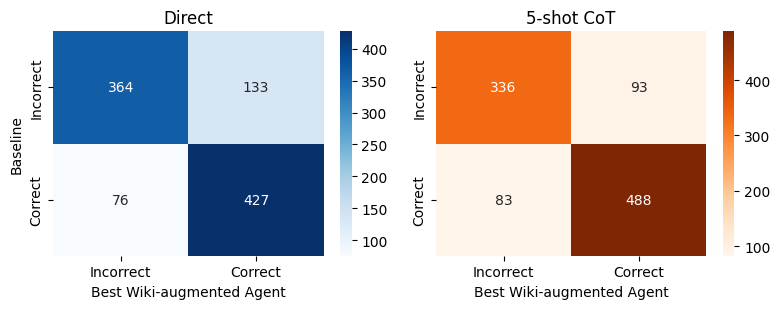

In [11]:
from sklearn.metrics import confusion_matrix

def analysis_df(df):
     # Assuming 'df' is your DataFrame and it has been processed as earlier
    analysis_df = pd.DataFrame({
        'Baseline_Correct': df['prediction_baseline'] == df['answer_idx_baseline'],
        'Extension_Correct': df['prediction_agent'] == df['answer_idx_agent']
    })
    scenario_counts_df = analysis_df.value_counts().reset_index()
    scenario_counts_df.columns = ['Baseline_Correct', 'Extension_Correct', 'Count']

    # Total number of questions
    total_questions = len(df)

    # Mapping scenarios for clarity and calculating percentages
    scenario_mapping = {
        (True, True): 'Both Correct',
        (False, True): 'Wiki-augmented Correct',
        (False, False): 'Neither Correct',
        (True, False): 'Baseline Correct'
    }
    scenario_counts_df['Scenario'] = scenario_counts_df.apply(lambda row: scenario_mapping[(row['Baseline_Correct'], row['Extension_Correct'])], axis=1)
    scenario_counts_df['Percentage'] = (scenario_counts_df['Count'] / total_questions) * 100
    return scenario_counts_df


# Assuming 'df_Direct' and 'df_CoT' are your dataframes with 'exactmatch_x' and 'exactmatch_y' as the true labels
#temp
df_Direct = df_MedMCQA_Direct
df_CoT = df_MedMCQA_CoT


# Create the confusion matrix for df_Direct
confusion_matrix_direct = confusion_matrix(df_Direct['exactmatch_baseline'], df_Direct['exactmatch_agent'])

# Create the confusion matrix for df_CoT
confusion_matrix_cot = confusion_matrix(df_CoT['exactmatch_baseline'], df_CoT['exactmatch_agent'])

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(8, 3.2))


# Plot for df_Direct
sns.heatmap(confusion_matrix_direct, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Direct')
axes[0].set_ylabel('Baseline')
axes[0].set_xlabel('Best Wiki-augmented Agent')

#change y and x tick labels to Correct and Incorrect
axes[0].set_yticklabels(['Incorrect', 'Correct'])
axes[0].set_xticklabels(['Incorrect', 'Correct'])

# Plot for df_CoT
sns.heatmap(confusion_matrix_cot, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('5-shot CoT')
#axes[1].set_ylabel('Baseline')
axes[1].set_xlabel('Best Wiki-augmented Agent')
#change y and x tick labels to Correct and Incorrect
axes[1].set_yticklabels(['Incorrect', 'Correct'])
axes[1].set_xticklabels(['Incorrect', 'Correct'])

plt.tight_layout()
plt.show()


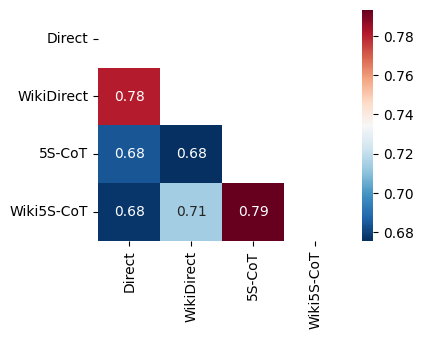

In [24]:
dfDirect = load_file(Direct)
dfWikiDirect = load_file(WikiDirect)
dfCoT = load_file(CoT)
dfWikiCoT = load_file(WikiCoT)
import numpy as np

# make a heatmap of the rate of agreement between the prediction feature of the four datasets
# the heatmap should show the rate of agreement between the prediction feature of the four datasets
# The prediction feature is categorical with 4 categories: 0, 1, 2, 3
# Function to calculate rate of agreement between two datasets
def calculate_agreement_rate(df1, df2):
    return np.mean(df1['prediction'] == df2['prediction'])

# Creating a matrix for the rate of agreement
datasets = [dfDirect, dfWikiDirect, dfCoT, dfWikiCoT]
dataset_names = ['Direct', 'WikiDirect', '5S-CoT', 'Wiki5S-CoT']
agreement_matrix = np.zeros((4, 4))
# Masking the diagonal and upper triangle of the agreement matrix
mask = np.triu(np.ones_like(agreement_matrix, dtype=bool))

for i in range(4):
    for j in range(4):
        agreement_matrix[i, j] = calculate_agreement_rate(datasets[i], datasets[j])

# Creating a heatmap with red-blue color map
plt.figure(figsize=(4, 3))
sns.heatmap(agreement_matrix, annot=True, fmt=".2f", cmap='RdBu_r',
            xticklabels=dataset_names, yticklabels=dataset_names, mask=mask)#, vmin=0.6, vmax=0.8)

#plt.title('Rate of Agreement between Datasets')
#make x and y tick labels smaller
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
# change the min and max values of the colorbar

# change rotation of xticklabels
#plt.xticks(rotation=45)




plt.show()


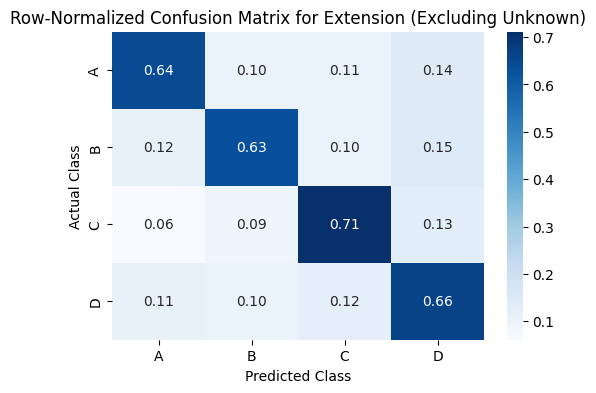

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming 'df' is your DataFrame with 'answer_idx_y' as actual classes 
# and 'prediction_y' as predicted classes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming 'df' is your DataFrame with 'answer_idx_y' as actual classes 
# and 'prediction_y' as predicted classes

# Filter out rows where 'prediction_y' is NaN (or 'Unknown')
filtered_df = df.dropna(subset=['prediction_y'])

# Generate the confusion matrix for known classes only
conf_matrix = confusion_matrix(filtered_df['answer_idx_y'], filtered_df['prediction_y'], labels=['A', 'B', 'C', 'D'])

# Normalize the confusion matrix by rows
row_normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# Plotting the row-normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(row_normalized_conf_matrix, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=['A', 'B', 'C', 'D'], 
            yticklabels=['A', 'B', 'C', 'D'])
plt.title('Row-Normalized Confusion Matrix for Extension (Excluding Unknown)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [116]:
# Filter the DataFrame based on the specified criteria
df = merge_baseline_and_agent(CoT, WikiCoT)
successful_extension = df[
    (df['prediction_agent'] == df['answer_idx_agent']) & 
    (df['prediction_baseline'] != df['answer_idx_baseline']) &
    (df['context'].notna())
]

bad_extension = df[
    (df['prediction_agent'] != df['answer_idx_agent']) &
    (df['prediction_baseline'] == df['answer_idx_baseline']) &
    (df['context'].notna())
]

def print_info(successful_extension):

    # Select the first such question (if any)
    if not successful_extension.empty:
        question_example = successful_extension.iloc[40]
    

        print(f"Question: {question_example['question_baseline']}")
        print(f"Answer options: {question_example['options_baseline']}")
        print(f"Baseline Prediction: {question_example['prediction_baseline']}, Ground Truth: {question_example['answer_idx_baseline']}")
        print(f"Extension Prediction: {question_example['prediction_agent']}, Ground Truth: {question_example['answer_idx_agent']}")
        print(f"Context: {question_example['context']}")
        print(f"CoT_baseline: {question_example['explanation_baseline']}")
        print(f"CoT_agent: {question_example['explanation_agent']}")
        
        #print(f"True label: {question_example['answer_idx_y']}")
    else:
        print("No such question found where the extension is successful and the baseline is not, with relevant context.")

print_info(bad_extension)


Question: A 68-year-old woman is referred to the outpatient psychiatry clinic from the medical clinic. The patient is being treated for urge incontinence but is being referred for psychiatric evaluation to help with some of her old avoidance behavior. For the 3 months that she had her urinary symptoms, she avoided places like long lines and long train rides. Even after being successfully treated for her urinary condition, she continues to show restricted social interaction. Which of the following is a true statement regarding the patient's condition?
Answer options: {'A': 'She fears not being able to escape similar situations.', 'B': 'Her symptoms need to last for at least 1 month.', 'C': 'She requires only one fear or avoidance situation to meet criteria for this condition.', 'D': 'Patients may have accompanying social phobia.'}
Baseline Prediction: A, Ground Truth: A
Extension Prediction: D, Ground Truth: A
Context: The content describes Avoidant Personality Disorder (AvPD), which is